In [1]:
import pandas as pd
import numpy as np

In [2]:
time_series = pd.read_csv("timeseriesdata.csv")

In [3]:
time_series.head()

,MONTH_YEAR,BILLED_USAGE,TOTAL_ENROLLMENT
0,2013-03-01,2.637977e+07,34522
1,2013-04-01,2.707221e+07,35373
2,2013-05-01,2.775124e+07,36246
3,2013-06-01,2.883749e+07,37720
4,2013-07-01,2.968774e+07,38871


In [9]:
time_series['MONTH_YEAR'].max()

KeyError: 'MONTH_YEAR'

C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 2499646462276.608


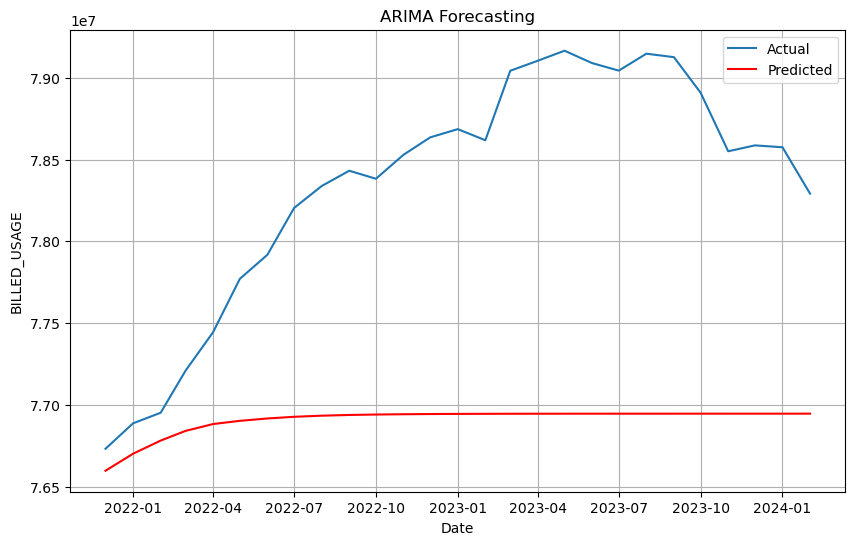

Forecasted BILLED_USAGE for the next 6 months:
2021-12-01    7.659813e+07
2022-01-01    7.670203e+07
2022-02-01    7.678230e+07
2022-03-01    7.684154e+07
2022-04-01    7.688353e+07
2022-05-01    7.690301e+07
Freq: MS, Name: predicted_mean, dtype: float64


In [4]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

time_series['MONTH_YEAR'] = pd.to_datetime(time_series['MONTH_YEAR'])

# Set 'MONTH_YEAR' as the index
time_series.set_index('MONTH_YEAR', inplace=True)

# Split the data into training and testing sets (80% for training, 20% for testing)
train_size = int(len(time_series) * 0.8)
train, test = time_series.iloc[:train_size], time_series.iloc[train_size:]

# Train the ARIMA model
model = ARIMA(train['BILLED_USAGE'], order=(5,1,0))  # You may need to adjust the order parameter
model_fit = model.fit()

# Validate the model using the testing data
predictions = model_fit.forecast(steps=len(test))

# Calculate Mean Squared Error
mse = mean_squared_error(test['BILLED_USAGE'], predictions)
print('Mean Squared Error:', mse)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['BILLED_USAGE'], label='Actual')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.title('ARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('BILLED_USAGE')
plt.legend()
plt.grid(True)
plt.show()

# Forecast BILLED_USAGE 6 months into the future
forecast = model_fit.forecast(steps=6)
print('Forecasted BILLED_USAGE for the next 6 months:')
print(forecast)


In [5]:
import itertools

# Define the range of values for p, d, and q
p_values = range(0, 6)  # Adjust range as needed
d_values = range(0, 2)  # Adjust range as needed
q_values = range(0, 6)  # Adjust range as needed

best_mse = float('inf')
best_order = None

# Iterate over all possible combinations of p, d, and q
for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        # Train the ARIMA model
        model = ARIMA(train['BILLED_USAGE'], order=(p, d, q))
        model_fit = model.fit()

        # Validate the model using the testing data
        predictions = model_fit.forecast(steps=len(test))

        # Calculate Mean Squared Error
        mse = mean_squared_error(test['BILLED_USAGE'], predictions)

        # Update best parameters if current parameters yield lower MSE
        if mse < best_mse:
            best_mse = mse
            best_order = (p, d, q)

        print(f"ARIMA({p},{d},{q}) MSE: {mse}")
    except:
        continue

print("\nBest Order:", best_order)
print("Best Mean Squared Error:", best_mse)


C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will b

ARIMA(0,0,0) MSE: 764514089866241.6
ARIMA(0,0,1) MSE: 745882829279919.2
ARIMA(0,0,2) MSE: 730700909079384.0
ARIMA(0,0,3) MSE: 716999033946121.9
ARIMA(0,0,4) MSE: 703827859161492.5
ARIMA(0,0,5) MSE: 691020720925509.1
ARIMA(0,1,0) MSE: 4053170839023.862
ARIMA(0,1,1) MSE: 3944359861215.8555
ARIMA(0,1,2) MSE: 3803037843965.907
ARIMA(0,1,3) MSE: 3599719429077.9287
ARIMA(0,1,4) MSE: 3397771212511.4556


C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will b

ARIMA(0,1,5) MSE: 3126006210987.293
ARIMA(1,0,0) MSE: 4461430507184.742
ARIMA(1,0,1) MSE: 4422125419424.762
ARIMA(1,0,2) MSE: 3916876856798.45
ARIMA(1,0,3) MSE: 3857068826305.5493


C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information 

ARIMA(1,0,4) MSE: 2783725342556.909
ARIMA(1,0,5) MSE: 3479541955378.44
ARIMA(1,1,0) MSE: 3918755810171.4644


C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information 

ARIMA(1,1,1) MSE: 33786116550543.88
ARIMA(1,1,2) MSE: 32835100685515.207


C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameter

ARIMA(1,1,3) MSE: 32340506430757.098
ARIMA(1,1,4) MSE: 31060059105410.19


C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameter

ARIMA(1,1,5) MSE: 29473937079228.383
ARIMA(2,0,0) MSE: 2501820231586.1523
ARIMA(2,0,1) MSE: 3661714315500.4307
ARIMA(2,0,2) MSE: 6340315289982.309
ARIMA(2,0,3) MSE: 2224704863653.029


C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information 

ARIMA(2,0,4) MSE: 1929360272802.5247
ARIMA(2,0,5) MSE: 911594479638.202
ARIMA(2,1,0) MSE: 3707534541949.5396


C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred 

ARIMA(2,1,1) MSE: 32726947755296.69
ARIMA(2,1,2) MSE: 33889590048860.33
ARIMA(2,1,3) MSE: 33316438797157.906


C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible startin

ARIMA(2,1,4) MSE: 32551192535447.082
ARIMA(2,1,5) MSE: 31428588059381.527
ARIMA(3,0,0) MSE: 3143756749439.871
ARIMA(3,0,1) MSE: 2706057146756.906


C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information 

ARIMA(3,0,2) MSE: 4503617862630.718
ARIMA(3,0,3) MSE: 6141043641103.982


C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information 

ARIMA(3,0,4) MSE: 764514089867651.0


C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred 

ARIMA(3,0,5) MSE: 1490705093706.3162
ARIMA(3,1,0) MSE: 3354107268181.848
ARIMA(3,1,1) MSE: 32106094597527.523
ARIMA(3,1,2) MSE: 33135497382147.332
ARIMA(3,1,3) MSE: 31836816312336.555


C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible startin

ARIMA(3,1,4) MSE: 32261268442142.582
ARIMA(3,1,5) MSE: 32087757807914.09


C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible startin

ARIMA(4,0,0) MSE: 4670276369667.226
ARIMA(4,0,1) MSE: 4061888158548.5054


C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimiza

ARIMA(4,0,2) MSE: 3402095404779.352
ARIMA(4,0,3) MSE: 3935632823573.8257


C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameter

ARIMA(4,0,4) MSE: 7162995877188.34


C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible startin

ARIMA(4,0,5) MSE: 17573218992622.586
ARIMA(4,1,0) MSE: 2965225177532.216


C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameter

ARIMA(4,1,1) MSE: 30801869155007.55
ARIMA(4,1,2) MSE: 32499830980271.395


C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameter

ARIMA(4,1,3) MSE: 32137058203030.367
ARIMA(4,1,4) MSE: 31098169209743.555


C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameter

ARIMA(4,1,5) MSE: 32674404415695.816


C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameter

ARIMA(5,0,0) MSE: 7341210701606.421


C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameter

ARIMA(5,0,2) MSE: 3515751040851.4863


C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameter

ARIMA(5,0,3) MSE: 3431617331376.8433


C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameter

ARIMA(5,0,4) MSE: 4012921987435.5845


C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred 

ARIMA(5,0,5) MSE: 9279451352298.541
ARIMA(5,1,0) MSE: 2499646462276.608


C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameter

ARIMA(5,1,1) MSE: 30125437198133.293
ARIMA(5,1,2) MSE: 31081262506518.67
ARIMA(5,1,3) MSE: 31871907460922.895


C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible startin

ARIMA(5,1,4) MSE: 32506189716471.91
ARIMA(5,1,5) MSE: 33125207044802.395

Best Order: (2, 0, 5)
Best Mean Squared Error: 911594479638.202


C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\emmao\anaconda3.0\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Mean Squared Error: 911594479638.202


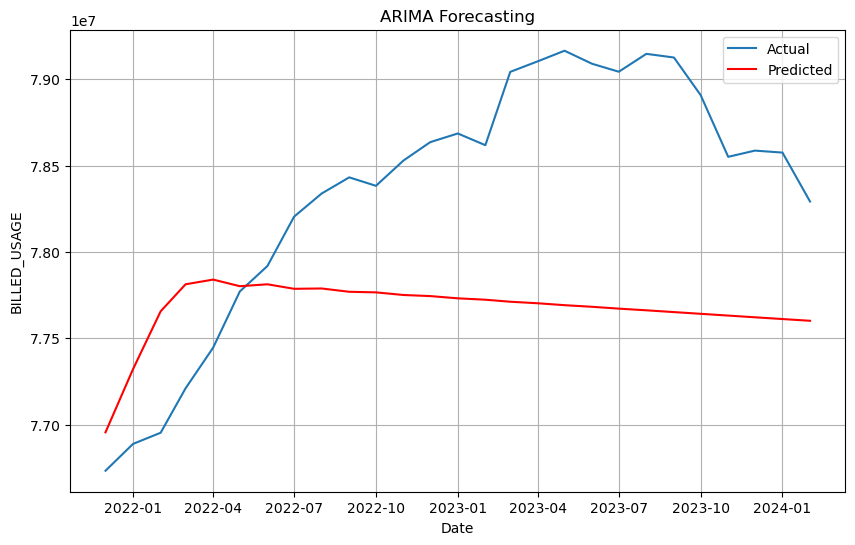

Forecasted BILLED_USAGE for the next 6 months:
2021-12-01    7.695485e+07
2022-01-01    7.732140e+07
2022-02-01    7.765576e+07
2022-03-01    7.781215e+07
2022-04-01    7.783939e+07
2022-05-01    7.780111e+07
Freq: MS, Name: predicted_mean, dtype: float64


In [7]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Split the data into training and testing sets (80% for training, 20% for testing)
train_size = int(len(time_series) * 0.8)
train, test = time_series.iloc[:train_size], time_series.iloc[train_size:]

# Train the ARIMA model
model = ARIMA(train['BILLED_USAGE'], order=(2, 0, 5))  # You may need to adjust the order parameter
model_fit = model.fit()

# Validate the model using the testing data
predictions = model_fit.forecast(steps=len(test))

# Calculate Mean Squared Error
mse = mean_squared_error(test['BILLED_USAGE'], predictions)
print('Mean Squared Error:', mse)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['BILLED_USAGE'], label='Actual')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.title('ARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('BILLED_USAGE')
plt.legend()
plt.grid(True)
plt.show()

# Forecast BILLED_USAGE 6 months into the future
forecast = model_fit.forecast(steps=6)
print('Forecasted BILLED_USAGE for the next 6 months:')
print(forecast)